# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [43]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [44]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#define the unit to metric
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units="+ units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | bubaque
Processing Record 3 of Set 1 | liaoyang
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | beloha
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | alamos
Processing Record 11 of Set 1 | nueva gerona
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | sao domingos do prata
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | xuanhua
Processing Record 16 of Set 1 | plainview
Processing Record 17 of Set 1 | bilma
Processing Record 18 of Set 1 | jumla
Processing Record 19 of Set 1 | nanortalik
Processing Record 20 of Set 1 | hualmay
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | nikolskoye
Processing Record 23 of Set 1 | a

Processing Record 36 of Set 4 | manturovo
Processing Record 37 of Set 4 | byron bay
Processing Record 38 of Set 4 | moramanga
Processing Record 39 of Set 4 | tiksi
Processing Record 40 of Set 4 | pevek
Processing Record 41 of Set 4 | kysyl-syr
Processing Record 42 of Set 4 | grand gaube
Processing Record 43 of Set 4 | george
Processing Record 44 of Set 4 | saint-francois
Processing Record 45 of Set 4 | barao de melgaco
Processing Record 46 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | anito
Processing Record 49 of Set 4 | borujerd
Processing Record 0 of Set 5 | harper
Processing Record 1 of Set 5 | gladstone
Processing Record 2 of Set 5 | namatanai
Processing Record 3 of Set 5 | lichinga
Processing Record 4 of Set 5 | sutton coldfield
Processing Record 5 of Set 5 | hasaki
Processing Record 6 of Set 5 | deniliquin
Processing Record 7 of Set 5 | san patricio
Processing Record 8 of Set 5 | aguimes
Processing Record 9 o

Processing Record 26 of Set 8 | novoagansk
Processing Record 27 of Set 8 | saint-joseph
Processing Record 28 of Set 8 | port augusta
Processing Record 29 of Set 8 | launceston
Processing Record 30 of Set 8 | norman wells
Processing Record 31 of Set 8 | carutapera
Processing Record 32 of Set 8 | sri aman
Processing Record 33 of Set 8 | alcaniz
Processing Record 34 of Set 8 | valparaiso
Processing Record 35 of Set 8 | lata
Processing Record 36 of Set 8 | lompoc
Processing Record 37 of Set 8 | rouvroy
Processing Record 38 of Set 8 | greymouth
Processing Record 39 of Set 8 | ginda
Processing Record 40 of Set 8 | hihifo
City not found. Skipping...
Processing Record 41 of Set 8 | onega
Processing Record 42 of Set 8 | erie
Processing Record 43 of Set 8 | barberton
Processing Record 44 of Set 8 | moerai
Processing Record 45 of Set 8 | asau
Processing Record 46 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 47 of Set 8 | fort-shevchenko
Processing Record 48 of Set 8 | prediv

Processing Record 12 of Set 12 | stein
Processing Record 13 of Set 12 | huilong
Processing Record 14 of Set 12 | chapais
Processing Record 15 of Set 12 | matara
Processing Record 16 of Set 12 | colares
Processing Record 17 of Set 12 | taiyuan
Processing Record 18 of Set 12 | santa maria
Processing Record 19 of Set 12 | mukhen
Processing Record 20 of Set 12 | bestobe
Processing Record 21 of Set 12 | kieta
Processing Record 22 of Set 12 | lodja
Processing Record 23 of Set 12 | petukhovo
Processing Record 24 of Set 12 | punta cardon
Processing Record 25 of Set 12 | fortuna
Processing Record 26 of Set 12 | broome
Processing Record 27 of Set 12 | jyvaskyla
Processing Record 28 of Set 12 | maykain
City not found. Skipping...
Processing Record 29 of Set 12 | clyde river
Processing Record 30 of Set 12 | mantua
Processing Record 31 of Set 12 | wuwei
Processing Record 32 of Set 12 | entre rios
Processing Record 33 of Set 12 | rock sound
Processing Record 34 of Set 12 | quthing
Processing Record 

In [45]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [46]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,26.33,76,100,7.92,PF,1678030936
1,bubaque,11.2833,-15.8333,24.62,64,15,4.10,GW,1678030937
2,liaoyang,41.2719,123.1731,6.18,58,27,3.94,CN,1678030937
3,bilibino,68.0546,166.4372,-30.90,100,100,0.71,RU,1678030937
4,tuktoyaktuk,69.4541,-133.0374,-37.00,67,0,1.54,CA,1678030937


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [48]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,26.33,76,100,7.92,PF,1678030936
1,bubaque,11.2833,-15.8333,24.62,64,15,4.10,GW,1678030937
2,liaoyang,41.2719,123.1731,6.18,58,27,3.94,CN,1678030937
3,bilibino,68.0546,166.4372,-30.90,100,100,0.71,RU,1678030937
4,tuktoyaktuk,69.4541,-133.0374,-37.00,67,0,1.54,CA,1678030937


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

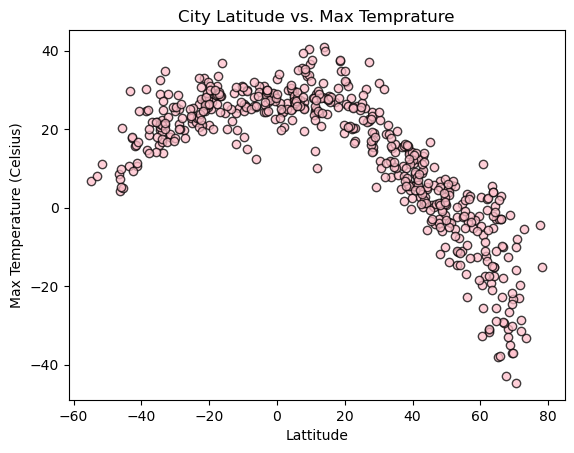

In [49]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]

plt.scatter(x, y, marker="o", facecolors="pink", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temprature")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (Celsius)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

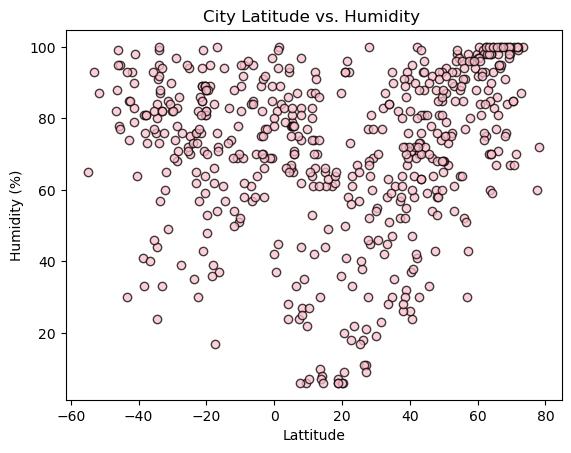

In [50]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]

plt.scatter(x, y, marker="o", facecolors="pink", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity ")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

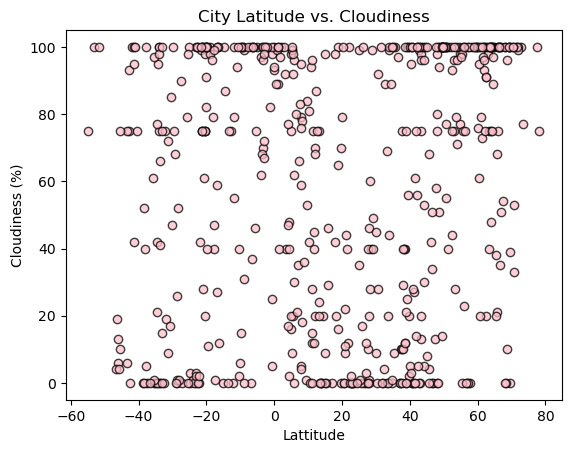

In [51]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]

plt.scatter(x, y, marker="o", facecolors="pink", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

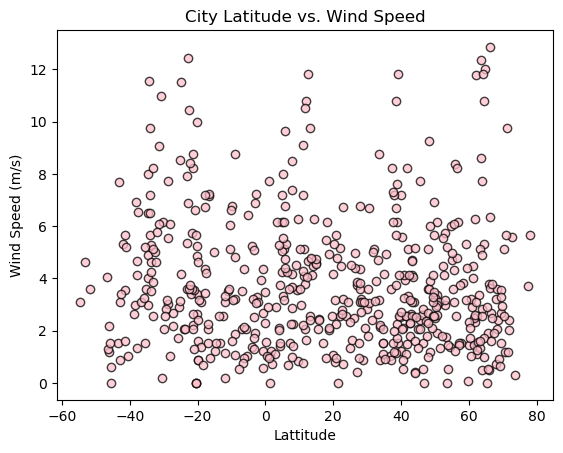

In [52]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]

plt.scatter(x, y, marker="o", facecolors="pink", edgecolors="black", alpha=0.75)
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bubaque,11.2833,-15.8333,24.62,64,15,4.10,GW,1678030937
2,liaoyang,41.2719,123.1731,6.18,58,27,3.94,CN,1678030937
3,bilibino,68.0546,166.4372,-30.90,100,100,0.71,RU,1678030937
4,tuktoyaktuk,69.4541,-133.0374,-37.00,67,0,1.54,CA,1678030937
8,severo-kurilsk,50.6789,156.1250,-3.55,75,100,3.37,RU,1678030938


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,26.33,76,100,7.92,PF,1678030936
5,avarua,-21.2078,-159.7750,28.03,89,75,8.23,CK,1678030937
6,ushuaia,-54.8000,-68.3000,6.81,65,75,3.09,AR,1678030937
7,beloha,-25.1667,45.0500,21.66,94,100,8.55,MG,1678030937
12,sao domingos do prata,-19.8650,-42.9683,28.91,48,100,1.60,BR,1678030938


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7918506377374641


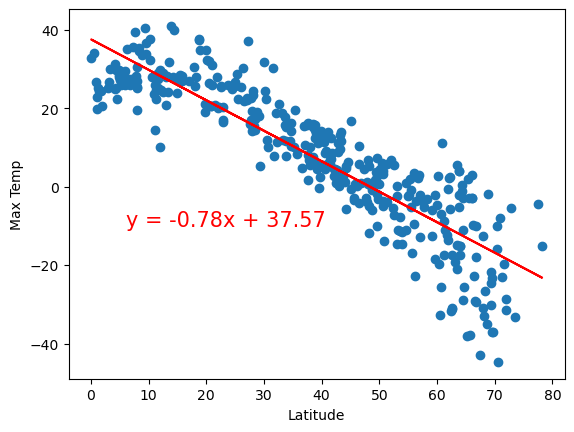

In [56]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))



The r-value is: 0.39934877163830435


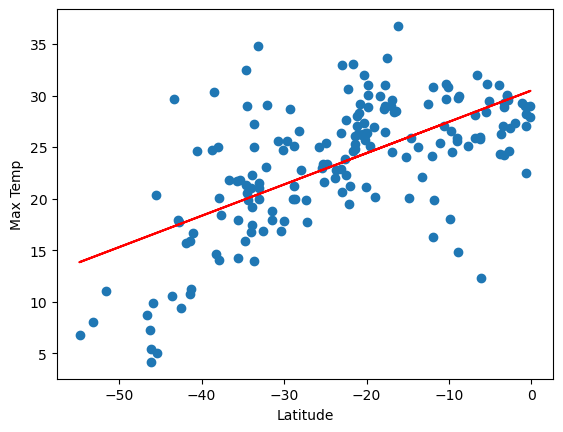

In [57]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))

**Discussion about the linear relationship:** There is a strong postive relantionship within the southern hemisphere. Within the northern hemisphere there is strong negative correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18684589944910346


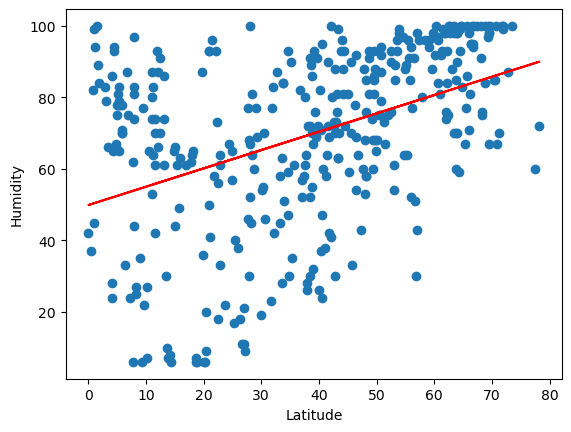

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,-10))

The r-value is: 0.0035583130356638235


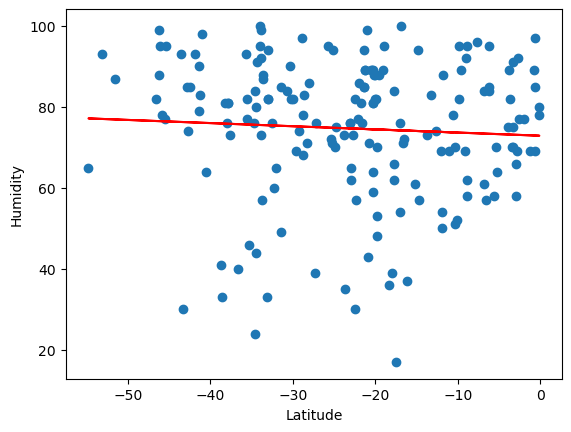

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,-10))

**Discussion about the linear relationship:** There is a weak negative correlation within the southern hemisphere. Within the northern hemisphere there is strong positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08341814641460375


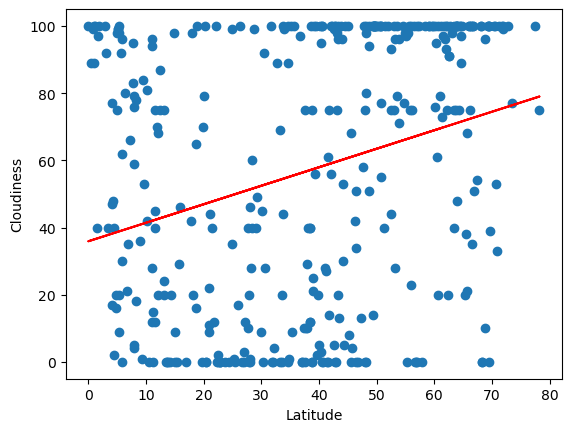

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6,-10))

The r-value is: 0.06729131887861096


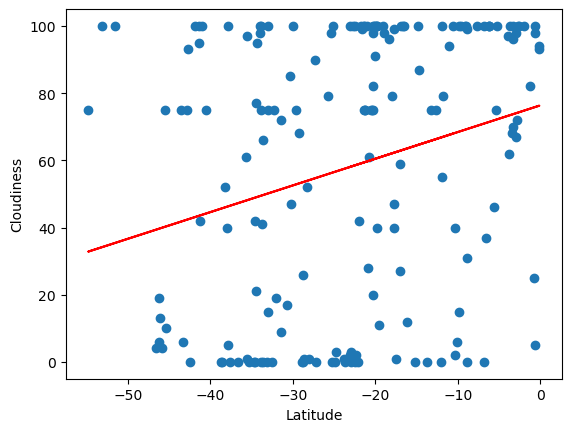

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6,-10))

**Discussion about the linear relationship:** There is a strong postive relantionship within the southern hemisphere. Within the northern hemisphere there is strong positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00259294243055311


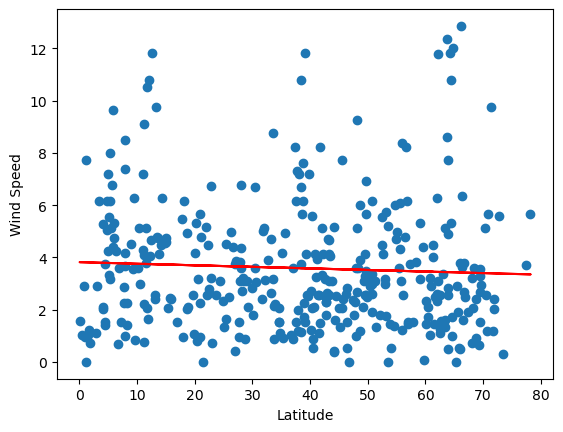

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,-10))

The r-value is: 0.013193952665831383


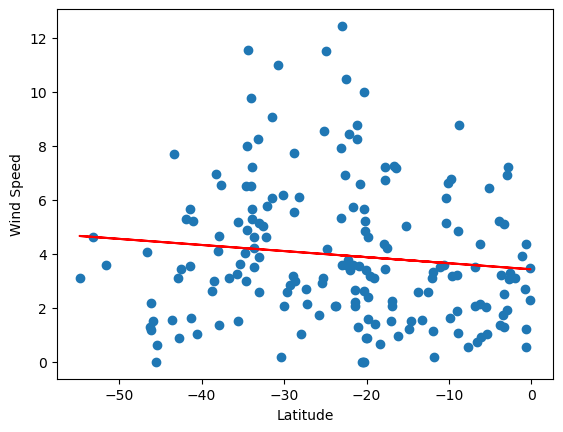

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,-10))

**Discussion about the linear relationship:** There is a weak negative correlation within the southern hemisphere. Within the northern hemisphere there is weak positive correlation.